In [1]:
import pandas as pd
import numpy as np
import os, re 
#re is a built-in Python module that provides support for working with regular expressions (often abbreviated as regex or regexp).
import string
import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt

import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
train = pd.read_csv("labeledTrainData.tsv",delimiter='\t')
test = pd.read_csv("testData.tsv",delimiter='\t')

In [3]:
train.shape, test.shape

((25000, 3), (25000, 2))

In [4]:
train.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [5]:
train['sentiment'].unique()

array([1, 0], dtype=int64)

In [6]:
train['review'][0]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [7]:
test.head()

,id,review
0,12311_10,Naturally in a film who's main themes are of m...
1,8348_2,This movie is a disaster within a disaster fil...
2,5828_4,"All in all, this is a movie for kids. We saw i..."
3,7186_2,Afraid of the Dark left me with the impression...
4,12128_7,A very accurate depiction of small time mob li...


In [8]:
test['review']

0        Naturally in a film who's main themes are of m...
1        This movie is a disaster within a disaster fil...
2        All in all, this is a movie for kids. We saw i...
3        Afraid of the Dark left me with the impression...
4        A very accurate depiction of small time mob li...
                               ...                        
24995    Sony Pictures Classics, I'm looking at you! So...
24996    I always felt that Ms. Merkerson had never got...
24997    I was so disappointed in this movie. I am very...
24998    From the opening sequence, filled with black a...
24999    This is a great horror film for people who don...
Name: review, Length: 25000, dtype: object

In [9]:
print("number of rows for sentiment 1: ",len(train[train['sentiment']==1]))
print("number of rows for sentiment 1: ",len(train[train['sentiment']==0]))

number of rows for sentiment 1:  12500
number of rows for sentiment 1:  12500


- There is equal distribution of data

In [10]:
train.groupby('sentiment').describe().transpose()

sentiment                                                      0  \
id     count                                               12500   
       unique                                              12500   
       top                                                7759_3   
       freq                                                    1   
review count                                               12500   
       unique                                              12432   
       top     When i got this movie free from my job, along ...   
       freq                                                    3   

sentiment                                                      1  
id     count                                               12500  
       unique                                              12500  
       top                                                5814_8  
       freq                                                    1  
review count                                               12500  
       unique                                              12472  
       top     Everyone knows about this ''Zero Day'' event. ...  
       freq                                                    2

In [11]:
# Creating a new column length of the review
train['length'] = train['review'].apply(len)
train.head()

,id,sentiment,review,length
0,5814_8,1,With all this stuff going down at the moment w...,2302
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",946
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,2449
3,3630_4,0,It must be assumed that those who praised this...,2245
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,2231


## Data Visualization

<Axes: ylabel='Frequency'>

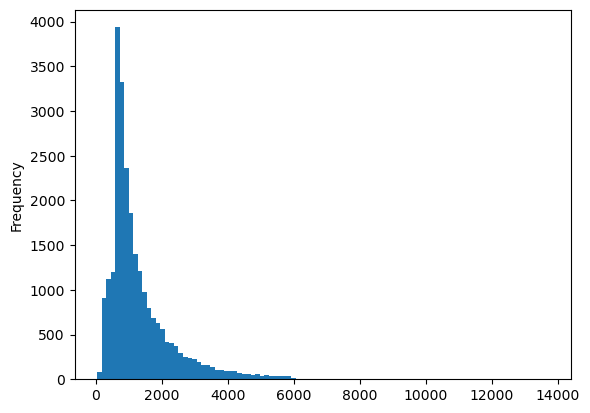

In [12]:
train['length'].plot.hist(bins=100)

In [13]:
train.length.describe()
# number of words and such details

count    25000.000000
mean      1327.710560
std       1005.239246
min         52.000000
25%        703.000000
50%        981.000000
75%       1617.000000
max      13708.000000
Name: length, dtype: float64

In [14]:
train[train['length']==13708].iloc[0]

id                                                      1175_9
sentiment                                                    1
review       Match 1: Tag Team Table Match Bubba Ray and Sp...
length                                                   13708
Name: 3485, dtype: object

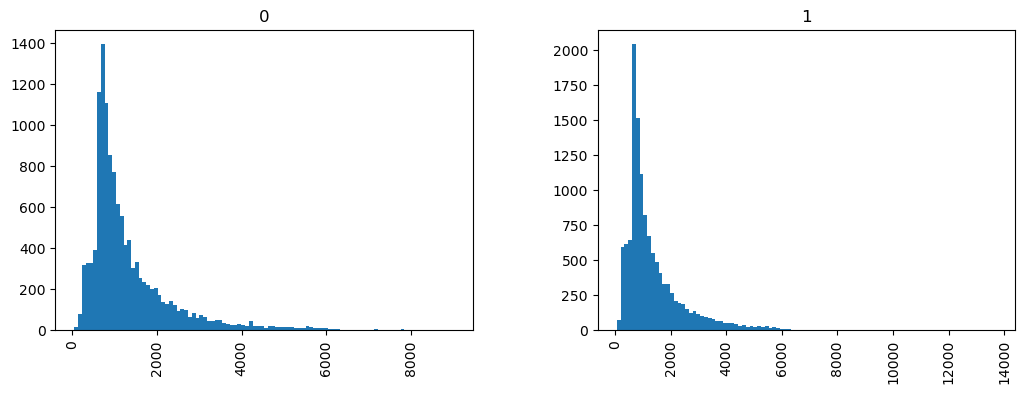

In [15]:
train.hist(column='length', by='sentiment', bins=100,figsize=(12,4))
plt.show()
#length---the column of the DataFrame (train) that you want to plot the histogram for.
#by = 'sentiment'----This parameter allows you to create separate histograms for different groups within your data.
#It means that separate histograms will be plotted for each unique value in the 'sentiment' column.

## Text Preprocessing

In [16]:
from bs4 import BeautifulSoup
#Creating a function for cleaning of data
def clean_text(raw_text):
    #1. remove HTML tags
    raw_text = BeautifulSoup(raw_text).get_text()
    #2. removing all non letters from text
    letters_only = re.sub("[^a-zA-Z]"," ",raw_text)
    #3. convert to lower case, split into individual words
    words = letters_only.lower().split()
    #4. create a variable which contains a set of stopwords
    stops = set(stopwords.words("english"))
    #5. remove stop words and return 
    return [w for w in words if not w in stops]    

In [17]:
#Cleaning review and also adding a new column for its count of words
import nltk
import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')

train['clean_review'] = train['review'].apply(clean_text)
train['length_clean_review'] = train['clean_review'].apply(len)
train.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,sentiment,review,length,clean_review,length_clean_review
0,5814_8,1,With all this stuff going down at the moment w...,2302,"[stuff, going, moment, mj, started, listening,...",219
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",946,"[classic, war, worlds, timothy, hines, enterta...",84
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,2449,"[film, starts, manager, nicholas, bell, giving...",240
3,3630_4,0,It must be assumed that those who praised this...,2245,"[must, assumed, praised, film, greatest, filme...",189
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,2231,"[superbly, trashy, wondrously, unpretentious, ...",210


In [18]:
# import nltk
# nltk.download('stopwords')

In [19]:
train.describe()

,sentiment,length,length_clean_review
count,25000.00000,25000.000000,25000.000000
mean,0.50000,1327.710560,119.523560
std,0.50001,1005.239246,90.583576
min,0.00000,52.000000,4.000000
25%,0.00000,703.000000,63.000000
50%,0.50000,981.000000,89.000000
75%,1.00000,1617.000000,146.000000
max,1.00000,13708.000000,1416.000000


In [20]:
#Checking the smallest review
print(train[train['length_clean_review']==4]['review'].iloc[0])
print("----------------After Cleaning---------------------------")
print(train[train['length_clean_review']==4]["clean_review"].iloc[0])

This movie is terrible but it has some good effects.
----------------After Cleaning---------------------------
['movie', 'terrible', 'good', 'effects']


# Word Cloud

## word cloud before cleaning

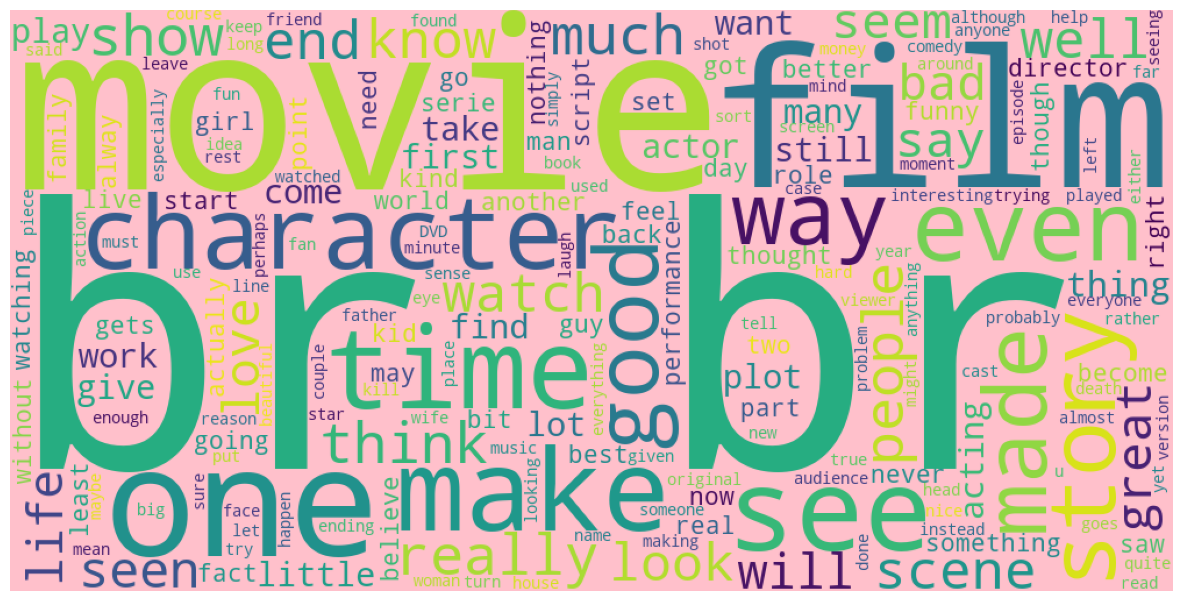

In [21]:
#Plot word cloud
word_cloud = WordCloud(width=1000,height=500, stopwords= STOPWORDS, background_color='pink').generate(''.join(train['review']))
plt.figure(figsize=(15,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [22]:
# saving the image
word_cloud.to_file('word_cloud.png')

# Vectorization

Now we'll convert each review, represented as a list of tokens into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
bow_transform = CountVectorizer(analyzer=clean_text).fit(train['review']) #bow= bag of word
print(len(bow_transform.vocabulary_))

74065


Let's take one review and get its bag-of-words counts as a vector, using our **bow_transformer**

In [25]:
review1 = train['review'][1]
print(review1)

\The Classic War of the Worlds\" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H. G. Wells' classic book. Mr. Hines succeeds in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different things in a movie. Those who envision themselves as amateur \"critics\" look only to criticize everything they can. Others rate a movie on more important bases,like being entertained, which is why most people never agree with the \"critics\". We enjoyed the effort Mr. Hines put into being faithful to H.G. Wells' classic novel, and we found it to be very entertaining. This made it easy to overlook what the \"critics\" perceive to be its shortcomings."


**It's Vector Representation**

In [26]:
bow1 = bow_transform.transform([review1])
print(bow1)
print(bow1.shape)

  (0, 1153)	1
  (0, 1860)	1
  (0, 2877)	1
  (0, 5089)	1
  (0, 7345)	2
  (0, 11671)	3
  (0, 12493)	1
  (0, 14613)	1
  (0, 14617)	3
  (0, 14782)	1
  (0, 17310)	1
  (0, 19658)	1
  (0, 19759)	1
  (0, 20008)	2
  (0, 20901)	1
  (0, 21030)	1
  (0, 21035)	2
  (0, 21147)	1
  (0, 21748)	1
  (0, 21754)	1
  (0, 21757)	1
  (0, 22499)	1
  (0, 22584)	1
  (0, 22585)	1
  (0, 22788)	1
  :	:
  (0, 45216)	1
  (0, 45629)	2
  (0, 46521)	1
  (0, 46850)	1
  (0, 48251)	1
  (0, 48288)	1
  (0, 50446)	1
  (0, 51816)	1
  (0, 52690)	1
  (0, 53240)	1
  (0, 54251)	1
  (0, 58936)	1
  (0, 59991)	1
  (0, 61334)	1
  (0, 61943)	1
  (0, 63259)	1
  (0, 65725)	1
  (0, 66191)	1
  (0, 66463)	1
  (0, 70380)	1
  (0, 71340)	1
  (0, 71498)	1
  (0, 71821)	2
  (0, 72911)	1
  (0, 73396)	1
(1, 74065)


In [27]:
print(bow_transform.get_feature_names_out()[71821])
print(bow_transform.get_feature_names_out()[72911])

wells
worlds


In [28]:
# Creating bag of words for our review variable
# sparse matrix
review_bow = bow_transform.transform(train['review'])

In [29]:
print('Shape of Sparse Matrix: ', review_bow.shape)
print('Amount of Non-Zero occurences: ', review_bow.nnz)

Shape of Sparse Matrix:  (25000, 74065)
Amount of Non-Zero occurences:  2450404


In [30]:
#Checking the sparcity of a sparse matrix
sparsity = (100.0 * review_bow.nnz / (review_bow.shape[0] * review_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.1323380274083575


## TF-IDF
Term Frequency - Inverse Document Frequency
After the counting, the term weighting and normalization can be done with tf-idf

**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).*

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it).*

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(review_bow)
tfidf1 =tfidf_transformer.transform(bow1)
print(tfidf1)

  (0, 73396)	0.061582405387422844
  (0, 72911)	0.10916204090045824
  (0, 71821)	0.24678226776886478
  (0, 71498)	0.06130848347869254
  (0, 71340)	0.07054912976037264
  (0, 70380)	0.06691025207731116
  (0, 66463)	0.08376908496574231
  (0, 66191)	0.11391853286104583
  (0, 65725)	0.05408056138661737
  (0, 63259)	0.1047755178999042
  (0, 61943)	0.08811567227327795
  (0, 61334)	0.11302952635114163
  (0, 59991)	0.10986956065151147
  (0, 58936)	0.11997053429431336
  (0, 54251)	0.11268631063864525
  (0, 53240)	0.13073660913364496
  (0, 52690)	0.0824732205199774
  (0, 51816)	0.05986262652464556
  (0, 50446)	0.077539268028452
  (0, 48288)	0.13122486190259133
  (0, 48251)	0.04143735557967593
  (0, 46850)	0.11689701180182505
  (0, 46521)	0.06665775481300043
  (0, 45629)	0.14376840111740952
  (0, 45216)	0.08006252757098449
  :	:
  (0, 22788)	0.10110289576849556
  (0, 22585)	0.13850169616266522
  (0, 22584)	0.10403788202119751
  (0, 22499)	0.05424308473387671
  (0, 21757)	0.06083289839379746
  (0, 2

We'll go ahead and check what is the IDF (inverse document frequency) of the word `'wholesome'` and of word `'psychopathic'`?

In [32]:
'wholesome' in bow_transform.vocabulary_

True

In [33]:
print(tfidf_transformer.idf_[bow_transform.vocabulary_['wholesome']])
print(tfidf_transformer.idf_[bow_transform.vocabulary_['psychopathic']])

7.32000861328004
7.99117688712121


In [34]:
#Let's transform the entire bag-of-words corpus into TF-IDF corpus at once:
review_tfidf = tfidf_transformer.transform(review_bow)
review_bow.shape

(25000, 74065)

# Modelling

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(train['review'],train['sentiment'],test_size=0.22,random_state=101)
len(X_train), len(X_test),len(X_train)+len(X_test)

(19500, 5500, 25000)

## Predictions

In [36]:
from sklearn.metrics import classification_report
def pred(predicted, compare):
    cm = pd.crosstab(compare, predicted)
    TN = cm.iloc[0,0]
    FN = cm.iloc[1,0]
    TP = cm.iloc[1,1]
    FP = cm.iloc[0,1]
    print("CONFUSION MATRIX----------------->")
    print(cm)
    print()

    #check the accuracy of the model
    print('Classification paradox :------->>')
    print('Accuracy :- ', round(((TP+TN)*100)/(TP+TN+FP+FN),2))
    print()
    print('False Negative Rate :- ',round((FN*100)/(FN+TP),2))
    print()
    print('False Postive Rate :- ',round((FP*100)/(FP+TN),2))
    print()
    print(classification_report(compare,predicted))

## Training Model

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression(random_state=101)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_train)
pred(predictions,y_train)

CONFUSION MATRIX----------------->
col_0         0     1
sentiment            
0          9042   682
1           499  9277

Classification paradox :------->>
Accuracy :-  93.94

False Negative Rate :-  5.1

False Postive Rate :-  7.01

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      9724
           1       0.93      0.95      0.94      9776

    accuracy                           0.94     19500
   macro avg       0.94      0.94      0.94     19500
weighted avg       0.94      0.94      0.94     19500



In [38]:
#Test set result
predictions = pipeline.predict(X_test)
pred(predictions,y_test)

CONFUSION MATRIX----------------->
col_0         0     1
sentiment            
0          2424   352
1           267  2457

Classification paradox :------->>
Accuracy :-  88.75

False Negative Rate :-  9.8

False Postive Rate :-  12.68

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      2776
           1       0.87      0.90      0.89      2724

    accuracy                           0.89      5500
   macro avg       0.89      0.89      0.89      5500
weighted avg       0.89      0.89      0.89      5500



### Naive Bayes Model

MNB is commonly used for classification tasks where the features (attributes) are discrete counts. It's well-suited for text classification tasks where the features represent word counts or term frequencies 
NB is typically used for classification tasks where the features are continuous-valued and assumed to follow a Gaussian (normal) distribution.

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),])  # train on TF-IDF vectors w/ Naive Bayes classifier

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_train)
pred(predictions,y_train)

CONFUSION MATRIX----------------->
col_0         0     1
sentiment            
0          9054   670
1           843  8933

Classification paradox :------->>
Accuracy :-  92.24

False Negative Rate :-  8.62

False Postive Rate :-  6.89

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      9724
           1       0.93      0.91      0.92      9776

    accuracy                           0.92     19500
   macro avg       0.92      0.92      0.92     19500
weighted avg       0.92      0.92      0.92     19500



In [40]:
#Result on test case
predictions = pipeline.predict(X_test)
pred(predictions,y_test)

CONFUSION MATRIX----------------->
col_0         0     1
sentiment            
0          2423   353
1           352  2372

Classification paradox :------->>
Accuracy :-  87.18

False Negative Rate :-  12.92

False Postive Rate :-  12.72

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2776
           1       0.87      0.87      0.87      2724

    accuracy                           0.87      5500
   macro avg       0.87      0.87      0.87      5500
weighted avg       0.87      0.87      0.87      5500



## Random Forest 

In [41]:

from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier(n_estimators = 500)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_train)
pred(predictions,y_train)

CONFUSION MATRIX----------------->
col_0         0     1
sentiment            
0          9724     0
1             0  9776

Classification paradox :------->>
Accuracy :-  100.0

False Negative Rate :-  0.0

False Postive Rate :-  0.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9724
           1       1.00      1.00      1.00      9776

    accuracy                           1.00     19500
   macro avg       1.00      1.00      1.00     19500
weighted avg       1.00      1.00      1.00     19500



In [42]:
#test set result
predictions = pipeline.predict(X_test)
pred(predictions,y_test)

CONFUSION MATRIX----------------->
col_0         0     1
sentiment            
0          2383   393
1           366  2358

Classification paradox :------->>
Accuracy :-  86.2

False Negative Rate :-  13.44

False Postive Rate :-  14.16

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      2776
           1       0.86      0.87      0.86      2724

    accuracy                           0.86      5500
   macro avg       0.86      0.86      0.86      5500
weighted avg       0.86      0.86      0.86      5500



#### Final model will be Logistic Regression

In [47]:
#Saving output
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline_logit = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_text)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression(random_state=101)),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline_logit.fit(train['review'],train['sentiment'])
test['sentiment'] = pipeline_logit.predict(test['review'])

In [48]:
test.head(5)

,id,review,sentiment
0,12311_10,Naturally in a film who's main themes are of m...,1
1,8348_2,This movie is a disaster within a disaster fil...,0
2,5828_4,"All in all, this is a movie for kids. We saw i...",1
3,7186_2,Afraid of the Dark left me with the impression...,1
4,12128_7,A very accurate depiction of small time mob li...,1


In [49]:
output = test[['id','sentiment']]
print(output)

             id  sentiment
0      12311_10          1
1        8348_2          0
2        5828_4          1
3        7186_2          1
4       12128_7          1
...         ...        ...
24995   2155_10          1
24996     59_10          1
24997    2531_1          0
24998    7772_8          1
24999  11465_10          1

[25000 rows x 2 columns]


In [50]:
#Submission file
output.to_csv("output.csv",index=False)